<h1 align="center">Wine Quality</h1>

# Load the data

In [106]:
# Import Pandas
import pandas as pd

# Import Numpy
import numpy as np

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
from sklearn.model_selection import cross_validate
# Import Tensorflow
import tensorflow as tf
import matplotlib.font_manager as font_manager

# Import scipy
from scipy import stats as st

# Import warnings
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

# Import Missing Nap
import missingno as msno

# Import Seaborn
import seaborn as sns

# Import Bokeh
from bokeh.plotting import figure, output_file, show
from bokeh.palettes import d3
from bokeh.io import output_notebook
from bokeh.models import Legend
output_notebook()

Loading BokehJS ...

The csv data file is seperated by ";" so we will use sep = ";" to load the data.

In [107]:
# Load the data
wine_red_df = pd.read_csv("data/winequality-red.csv", sep = ";")
wine_white_df = pd.read_csv("data/winequality-white.csv", sep = ";")

Let see whether we have the data or not by viewing the top 5 samples in the red and white dataset.

In [108]:
# View first five samples of the Red wine data
wine_red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [109]:
# View first five samples of the White wine data
wine_white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Thus we see that we have our data being loaded succesfully. But how many samples and variables we have in our dataset.? Ok lets take a time to answer that question.

In [110]:
# Dimension of the data
print("The Red wine dataset has", wine_red_df.shape[0], "number of observations and", 
      wine_red_df.shape[1], "variables")
print("The White wine dataset has", wine_white_df.shape[0], "number of observations and",
      wine_white_df.shape[1], "variables")

The Red wine dataset has 1599 number of observations and 12 variables
The White wine dataset has 4898 number of observations and 12 variables


# Data Preprocessing

In [111]:
# Plot the missing map
#def missing_map(data, color, title = "Missing map"):
    # Missing map from missingno
  #  plot = msno.matrix(data, color=(0.21,  0.53, 0.8), inline = False)
    # Adding the title
  #  plot.suptitle(t = title, fontsize = 40, weight = "bold", y = 1.15)
    # Make the plot
  #  plot.show()

# Calling the missing_map() over the Red and White wine data
#missing_map(wine_red_df, (0.21,  0.53, 0.8), "Red Wine Missing map")
#missing_map(wine_white_df, (0.21,  0.53, 0.8), "White Wine Missing map")

Thus we kind of see that there is no missing data in the dataset using missing map. However just confirm that we hardly have no missing values, we will run a small sanity check over the dataset.

In [112]:
# Compute the percentage of missing value in the data
def missing_percentage(data1, data2, col_name = "Missing value (%)"):
    # Calculating the missing percentage
    missing_df1 = pd.DataFrame(data1.isnull().sum() /len(data1)*100, columns = [col_name])
    missing_df2 = pd.DataFrame(data2.isnull().sum() /len(data2)*100, columns = [col_name])
    # Forming the output dataframe
    missing_df = pd.DataFrame({'Red Wine': missing_df1.iloc[:, 0], 'White wine': missing_df2.iloc[:, 0]})
    return missing_df

missing_percentage(wine_red_df, wine_white_df)

,Red Wine,White wine
fixed acidity,0.0,0.0
volatile acidity,0.0,0.0
citric acid,0.0,0.0
residual sugar,0.0,0.0
chlorides,0.0,0.0
free sulfur dioxide,0.0,0.0
total sulfur dioxide,0.0,0.0
density,0.0,0.0
pH,0.0,0.0
sulphates,0.0,0.0


Above table in additon to the missing map clearly shows that we have the data intact 100% and there is no missing data in the our dataset. 

# Exploratory Data Analysis

In [113]:
def custom_style(title, xlab, ylab, width = 800, height = 600):
    # Create the plot
    p = figure(plot_width = width, plot_height = height, title = title, x_axis_label = xlab, y_axis_label = ylab)
    # Custom changes
    p.title.text_font_size = "20pt"
    p.title.align = "center"
    p.xaxis.axis_label_text_font_size = "20pt"
    p.yaxis.axis_label_text_font_size = "20pt"
    return p

def custom_barplot(data, width = 800, height = 600, color = "#3687cc", title = "Barplot", xlab = "Category",
                   ylab = "Counts"):
    # Get the quantity and its count from the dataset
    counts = data.value_counts()
    # Get the custom style formsts
    p = custom_style(width = width, height = height, title = title, xlab = xlab, ylab = ylab)
    
    # Call the vertical bar
    p.vbar(x = counts.index, top = counts.values, width = 0.5, bottom = 0,  color = color)
    
    # Show the plot
    return show(p)

custom_barplot(wine_red_df.quality, title = "Red Wine Quality", xlab = "Quality Level of wine (0 to 10 scale)", 
               ylab = "Counts")

In [114]:
custom_barplot(wine_white_df.quality, title = "White Wine Quality", xlab = "Quality Level of wine (0 to 10 scale)", 
               ylab = "Counts")

In [115]:
# Quanlity and Alcohol
def scatter_plot(data, x, y, title = "Scatter Plot", xlab = "X-axis", ylab ="Y-axis"):
    p = custom_style(title = title, xlab = xlab, ylab = ylab)
    data = wine_red_df
    grouped_data = [data.loc[data[x] == i, [x, y]] 
                    for i in np.unique(data[x])]
    color_list = d3['Category10'][len(grouped_data)]
    for i in range(len(grouped_data)):
        p.circle(grouped_data[i][x].tolist(), grouped_data[i][y].tolist(), size = 10, color = color_list[i])
    show(p)
    
scatter_plot(wine_red_df, x = "quality", y = "alcohol", title = "Red Wine's Quality vs Alcohol", 
             xlab = "Quality Level of wine (0 to 10 scale)", ylab = "Alcohol Content")

In [116]:
scatter_plot(wine_white_df, x = "quality", y = "alcohol", title = "White Wine's Quality vs Alcohol", 
             xlab = "Quality Level of wine (0 to 10 scale)", ylab = "Alcohol Content")

## Correlation

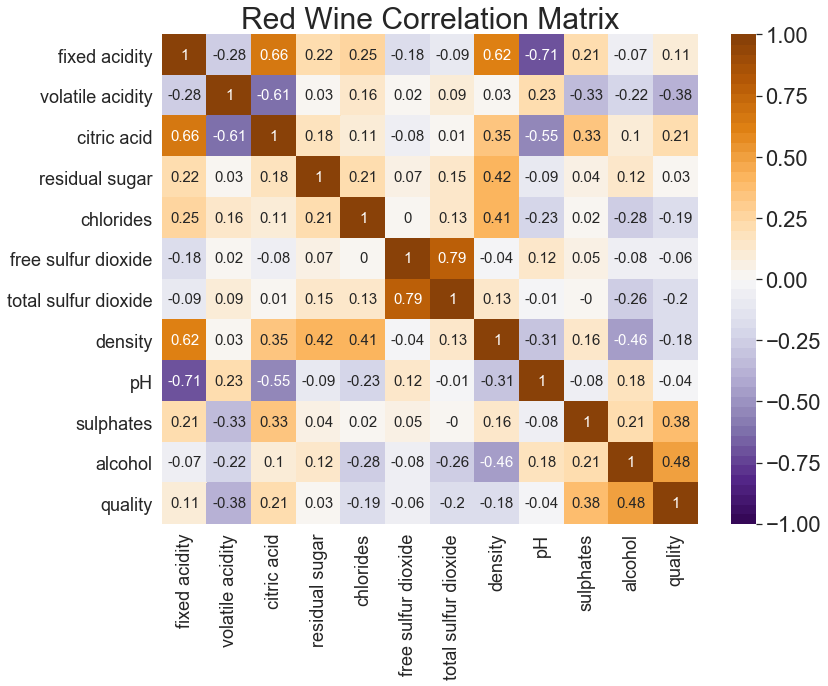

In [117]:
def confusion_matrix_plot(data, title = "Red Wine Correlation Matrix", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 30)
    ax.title.set_position([.5, 1.03])
    ax.set_xticklabels(labels = conf_mat.index, fontsize = 18)
    ax.set_yticklabels(labels = conf_mat.index, fontsize = 18)
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(wine_red_df, title = "Red Wine Correlation Matrix")

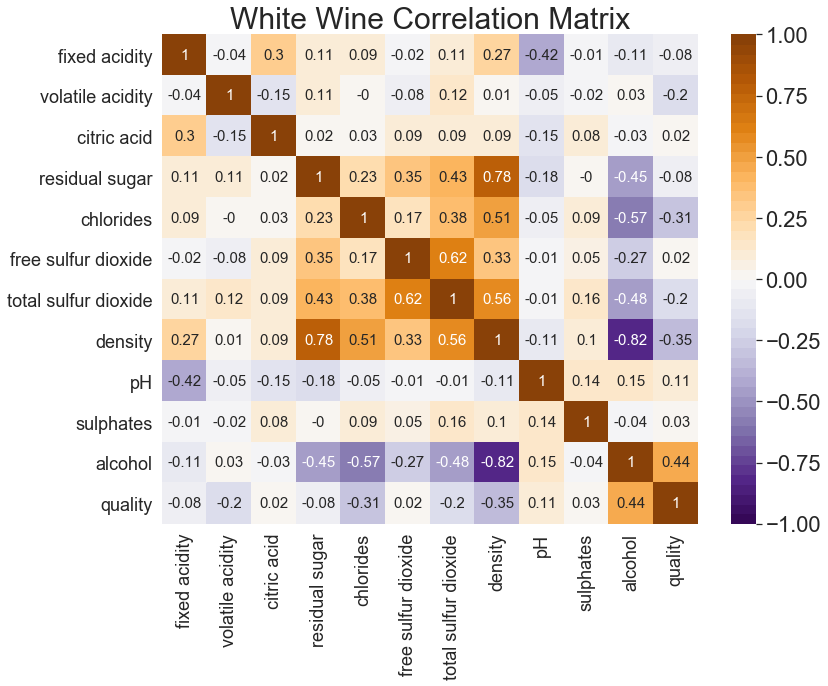

In [118]:
confusion_matrix_plot(wine_white_df, title = "White Wine Correlation Matrix")

## Skewness

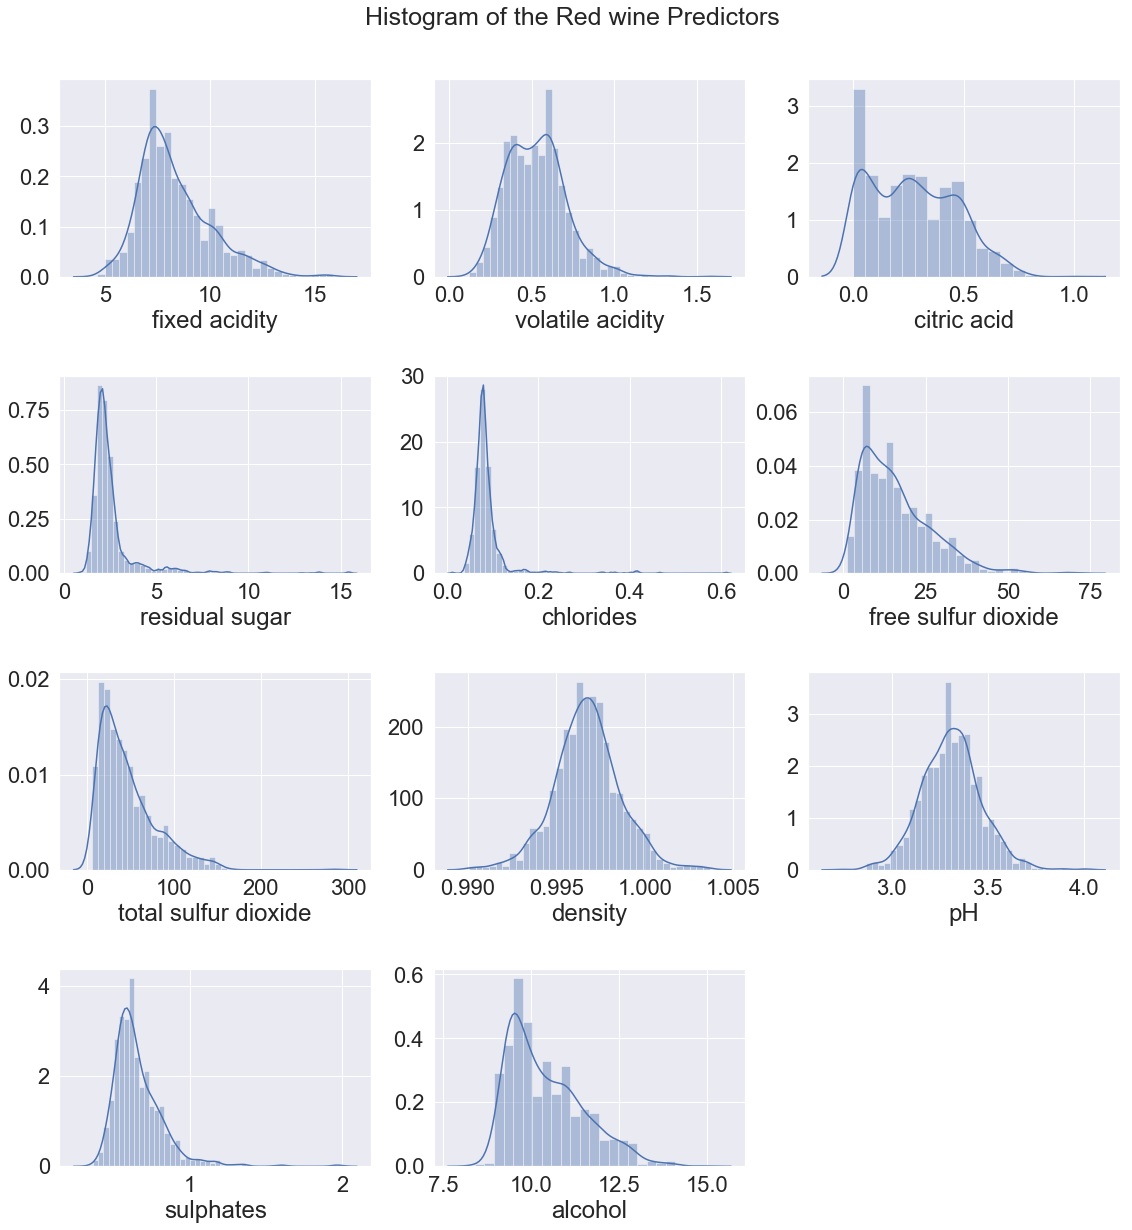

In [119]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the two subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=25, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        sns.distplot(wine_red_df.iloc[:, i], ax=ax)
        ax.xaxis.get_label()
    # Show the plot
    plt.show()
    
subplot_hist(wine_red_df.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the Red wine Predictors")

Before talking abour this let us also visualize the white wine dataset predictors also.

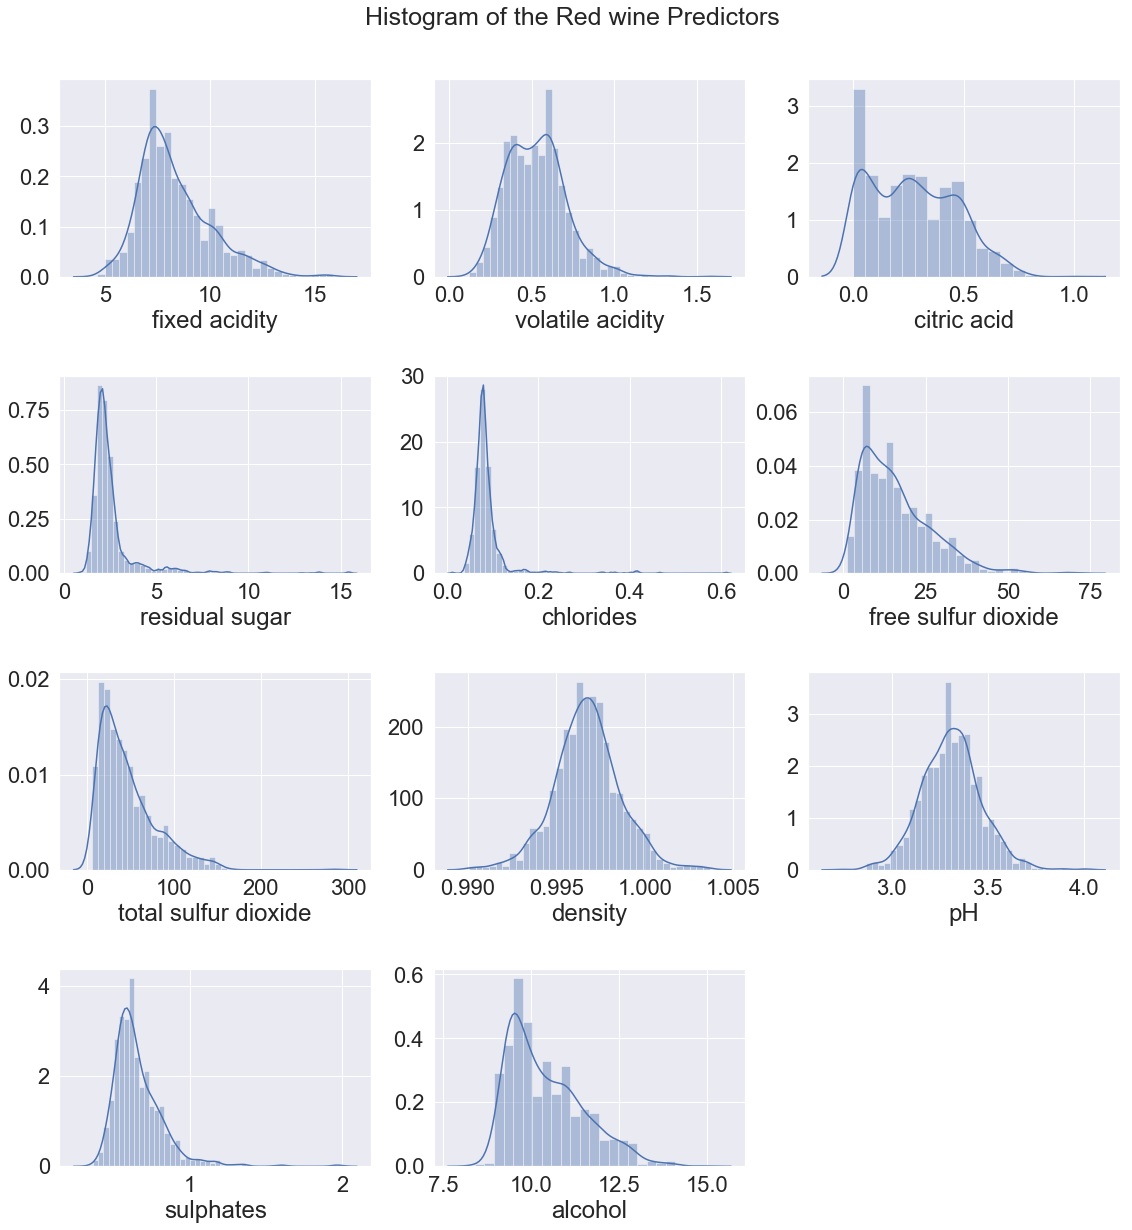

In [120]:
subplot_hist(wine_white_df.iloc[:, :-1], row = 4, column = 3, title = "Histogram of the Red wine Predictors")

In [121]:
wine_red_df[["citric acid"]] += 0.1
wine_white_df[["citric acid"]] += 0.1

In [122]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Red Wine
skewness_check(wine_red_df.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,0.981829,Heavily Skewed
1,volatile acidity,0.670962,Heavily Skewed
2,citric acid,0.318039,Light Skewed
3,residual sugar,4.536395,Heavily Skewed
4,chlorides,5.675017,Heavily Skewed
5,free sulfur dioxide,1.249394,Heavily Skewed
6,total sulfur dioxide,1.514109,Heavily Skewed
7,density,0.071221,Light Skewed
8,pH,0.193502,Light Skewed
9,sulphates,2.426393,Heavily Skewed


In [123]:
# Skewness for White Wine
skewness_check(wine_white_df.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,0.647553,Heavily Skewed
1,volatile acidity,1.576497,Heavily Skewed
2,citric acid,1.281528,Heavily Skewed
3,residual sugar,1.076764,Heavily Skewed
4,chlorides,5.021792,Heavily Skewed
5,free sulfur dioxide,1.406314,Heavily Skewed
6,total sulfur dioxide,0.390590,Light Skewed
7,density,0.977474,Heavily Skewed
8,pH,0.457642,Light Skewed
9,sulphates,0.976894,Heavily Skewed


It is the same scanario with white wine too. Here also we have lot of skewed values. So applying box =cox transformation should considerably helpw with removing the skewness.

In [124]:
# Boxcox Tranformation
def boxcox_trans(data):
    for i in range(data.shape[1]):
        data.iloc[:, i], _ = st.boxcox(data.iloc[:, i])
    return data

# Subset the predcitors
red_trans = wine_red_df.copy(deep = True)
red_trans.iloc[:, :-1] = boxcox_trans(red_trans.iloc[:, :-1])
skewness_check(red_trans.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,0.000517,Light Skewed
1,volatile acidity,0.000595,Light Skewed
2,citric acid,-0.112744,Light Skewed
3,residual sugar,-0.095840,Light Skewed
4,chlorides,-0.499174,Light Skewed
5,free sulfur dioxide,-0.019759,Light Skewed
6,total sulfur dioxide,-0.008021,Light Skewed
7,density,-0.004737,Light Skewed
8,pH,-0.000300,Light Skewed
9,sulphates,-0.024756,Light Skewed


In [125]:
# Subset the predcitors
white_trans = wine_white_df.copy(deep = True)
white_trans.iloc[:, :-1] = boxcox_trans(white_trans.iloc[:, :-1])
skewness_check(white_trans.iloc[:, :-1])

,Column,Skewness,Skew Category
0,fixed acidity,-0.005864,Light Skewed
1,volatile acidity,-0.005001,Light Skewed
2,citric acid,0.110011,Light Skewed
3,residual sugar,-0.051901,Light Skewed
4,chlorides,-0.159103,Light Skewed
5,free sulfur dioxide,0.030898,Light Skewed
6,total sulfur dioxide,0.022700,Light Skewed
7,density,0.018593,Light Skewed
8,pH,-0.003674,Light Skewed
9,sulphates,-0.001163,Light Skewed


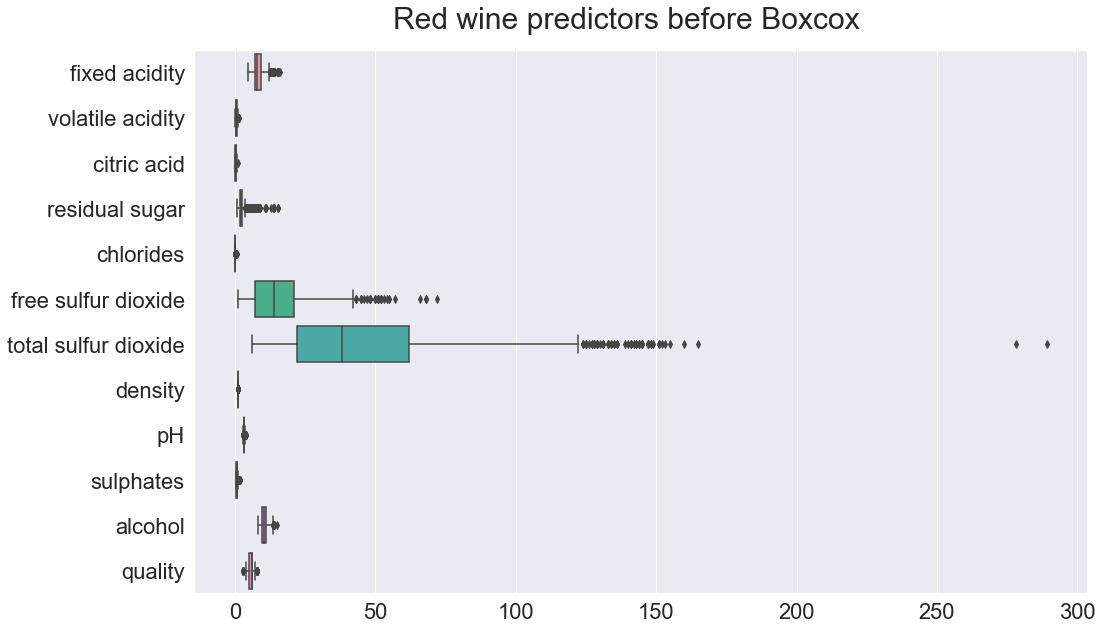

In [126]:
# Custom boxplot
def box_plot(data, height = 10, width = 16, title = "Boxplot"):
    # Make the figure object
    plt.figure(figsize=(width, height))
    # Add title
    plt.suptitle(title, y = 0.94, fontsize = 30)
    # Scale the font size
    sns.set(font_scale = 2)
    # Create the boxplot
    sns.boxplot(data = data, orient = "h")
    
box_plot(data = wine_red_df, title = "Red wine predictors before Boxcox")

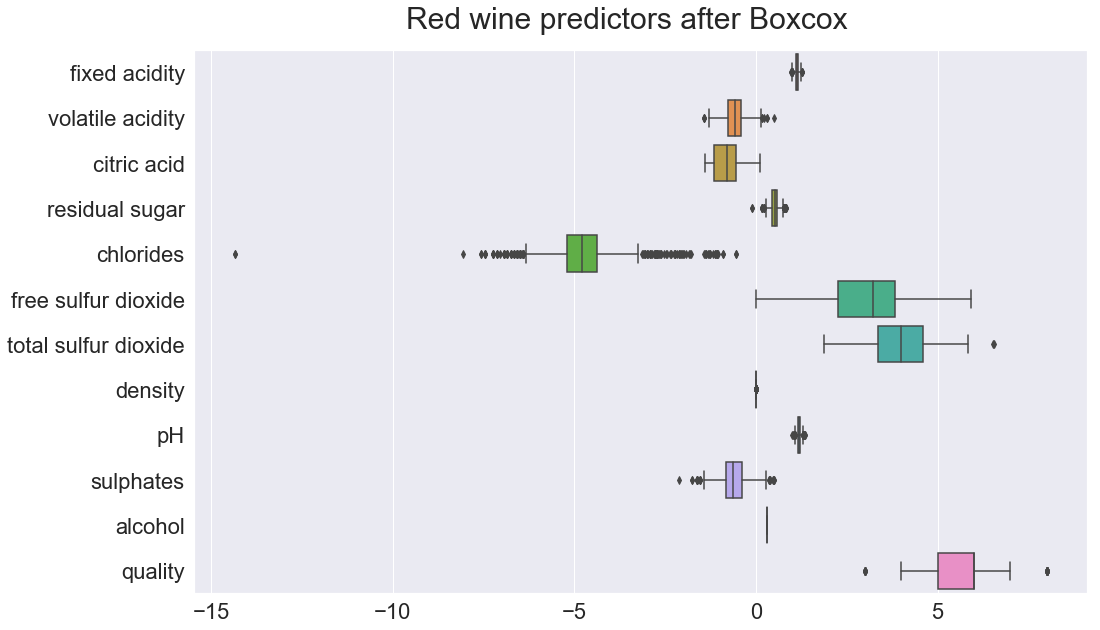

In [127]:
box_plot(data = red_trans, title = "Red wine predictors after Boxcox")

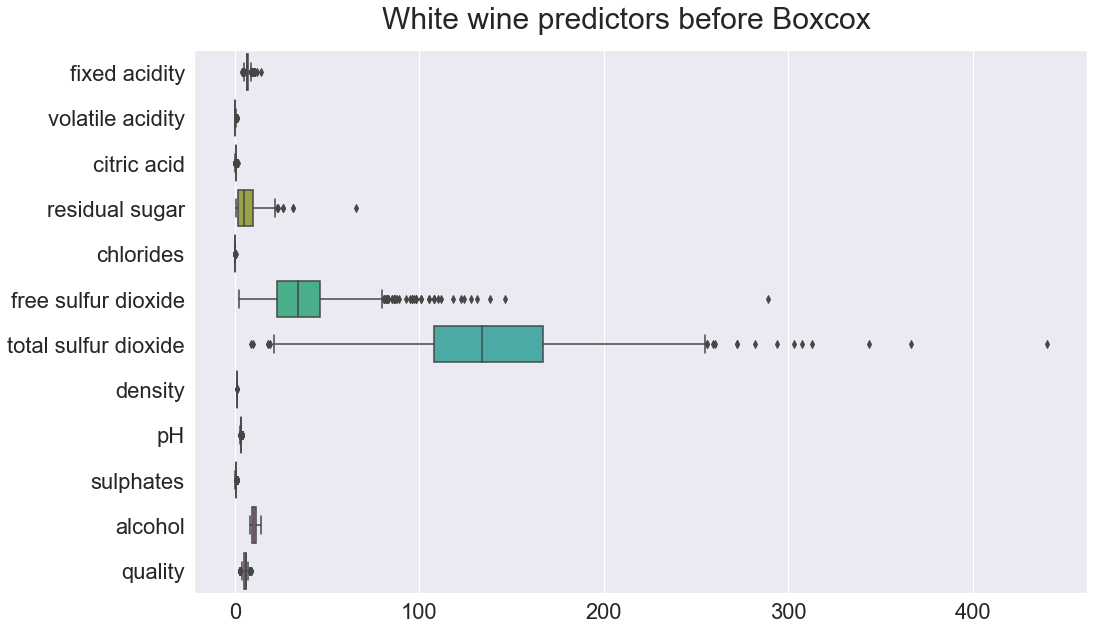

In [128]:
box_plot(data = wine_white_df, title = "White wine predictors before Boxcox")

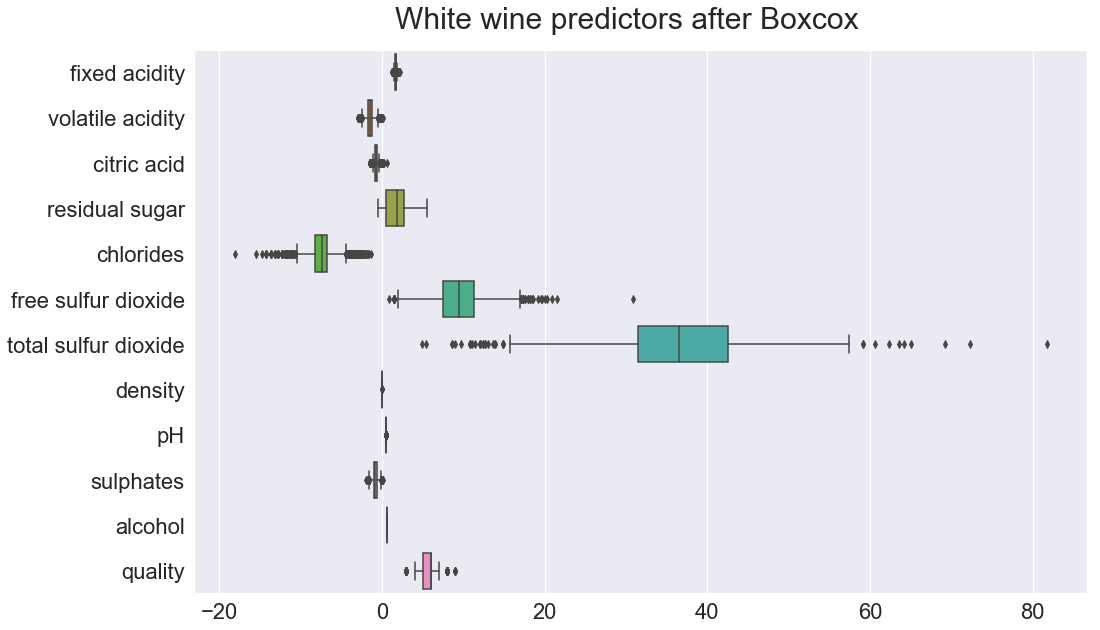

In [129]:
box_plot(data = white_trans, title = "White wine predictors after Boxcox")

We can clearly see that we were able to scale the predictors and at the same time remove some outliers from the data.

In [130]:
# Split the the whole data into test and train
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(wine_red_df.iloc[:, :-1], wine_red_df.iloc[:, -1],
                                                    test_size=0.25, random_state=1)
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(wine_white_df.iloc[:, :-1], wine_white_df.iloc[:, -1],
                                                    test_size=0.25, random_state=1)

In [131]:
# Custom functions to use the SvM model
def svm_accuracy_cv(X_train, X_test, y_train, y_test, n_fold = 10):
    # Intialize the variables
    best_score = 0
    best_C = 10000
    C_list = [1, 10, 100, 1000]
    for C in C_list:
        # Creating the SVM model 
        svc = svm.SVC(C = C, kernel = 'rbf')
        # Getting the scores on n folds
        scores = cross_val_score(svc, X_train, y_train, cv = n_fold)
        score = scores.mean()
        # Check and assign the best score paramters
        if score > best_score:
            best_C = C
            best_score = score
    # Fir the complete model over all the training data
    svc = svm.SVC(C = best_C, kernel = "rbf")
    svc.fit(X_train, y_train)
    # Get the accuracy over the teating data
    accuracy = svc.score(X_test, y_test)
    return accuracy, best_C

# Compute the accuracy
red_wine_accuracy, C_red = svm_accuracy_cv(X_train_red, X_test_red, y_train_red, y_test_red, n_fold = 10)
white_wine_accuracy, C_white = svm_accuracy_cv(X_train_white, X_test_white, y_train_white, y_test_white, n_fold = 10)

# Print the accuracy
print("The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is", 
      round(red_wine_accuracy * 100, 2), "percentage with the best cost value of", C_red)
print("The accuracy of the SVM model on White wine dataset with 10 fold cross validation is", 
      round(white_wine_accuracy * 100, 2), "percentage with the best cost value of", C_white)

The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is 57.75 percentage with the best cost value of 1000
The accuracy of the SVM model on White wine dataset with 10 fold cross validation is 57.55 percentage with the best cost value of 1000


### Thus the accuracy of the SVM model on both the dataset training with 10 fold cross validation is below

|   Dataset    |    Accuracy   |    Cost   |
|--------------|---------------|-----------|
|   Red Wine   |     57.75%    |    1000   |
|  White Wine  |     57.55%    |    1000   |

Okay, Now we have the model for predicting the quality scale of the red and white wine seperately. Can we bulid a model that can make predicition on whether it is a red or white wine? Of course we can, let also bulid that model. For this we need to merge both the dataset into one single dataset by haveing new column that represent '0' for Red and '1' white wine. Then we will follow the same procedure as previously to use the custom SVM model we bulid before.

In [132]:
# Adding the new column wine type 
red_trans["wine type"] = 0
white_trans["wine type"] = 1

# Concatenate both the dataset
wine_df = pd.concat([red_trans, white_trans], axis = 0, ignore_index = False)

# Split the the whole data into test and train
X_train, X_test, y_train, y_test = train_test_split(wine_df.iloc[:, :-1], wine_df.iloc[:, -1],
                                                    test_size=0.25, random_state=1)

# Compute the accuracy
accuracy, C = svm_accuracy_cv(X_train, X_test, y_train, y_test, n_fold = 10)

# Print the accuracy
print("The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is", 
      round(accuracy * 100, 2), "percentage with the best cost value of", C_red)

The accuracy of the SVM model on Red wine dataset with 10 fold cross validation is 100.0 percentage with the best cost value of 1000


## Neural Networks with Tensorflow

In [133]:
class NeuralNet:
    
    # initalize the class variables
    def __init__(self, learning_rate = 0.001, batch_size = 100, epochs = 1000):
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        self.epochs = epochs
    
    # One hot encoding of the labels
    def dense_to_one_hot(self, labels_dense, num_classes = 2):
        # Intialize the output variable
        labels_one_hot = []
        # Frame the label array
        for label in labels_dense:
            indices = [1]*num_classes
            indices[label] = 0
            labels_one_hot.append(indices)
        return labels_one_hot

    # Create batches of the training set
    def make_batch(self, X, y, batch_size):
        # Compute the length of the data
        y_size = len(y)
        # Create random batches
        index_sample = np.random.choice(X.shape[0], batch_size, replace=False)
        y_array = np.array(y)
        # Subset by the index
        X_batch = X[index_sample, :]
        y_batch = y_array[index_sample]
        return X_batch, y_batch
    
    # Computes the soft max layer
    def softmax_layer(self, X_tensor, num_units):
        # Get the size of the input from the tensor
        num_inputs = X_tensor.get_shape()[1].value
        # Create weight, bias and label variables
        W = tf.Variable(tf.zeros([num_inputs, num_units]), name='W')
        b = tf.Variable(tf.zeros([num_units]), name='b')
        # Compute out y on the this layer
        y = tf.nn.softmax(tf.matmul(X_tensor, W) + b)
        return y
    
    # Computes the Rectified Linear Units
    def relu_layer(self, X_tensor, num_units):
        # Get the size of the input from the tensor
        num_inputs = X_tensor.get_shape()[1].value
        # Create weight, bias and label variables
        W = tf.Variable(tf.random_uniform([num_features, num_units]), name='W')
        b = tf.Variable(tf.zeros([num_units]), name='b')
        # Compute the rectified linear unit activation on this point
        y = tf.nn.relu(tf.matmul(X_tensor, W) + b, name='relu')
        return y
    
    # Compute teh cost function
    def define_cost_function(self, y, y_tensor, batch_size):
        # Define the cross entropy cost
        cost = -tf.reduce_sum(y_tensor * tf.log(y), name='cross_entropy') / batch_size
        return cost
    
    # Train the model
    def train(self, cost, learning_rate):
        # Use Gradient descent to compute the optimum
        training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
        return training_step
    
    # Formulates the accuracy
    def compute_accuracy(self, y, y_tensor):
        # Check the predictions
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_tensor, 1))
        # Compute the accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"), name='accuracy')
        return accuracy
    
    # bulid the two layer Net
    def two_layers(self):
        # Create hidden, relu layer
        with tf.name_scope("hidden_layer") as scope:
            y_relu = self.relu_layer(X_placeholder, hidden_layer_units)

        # Create softmax layer
        with tf.name_scope("softmax") as scope:
            y_softmax = self.softmax_layer(y_relu, num_classes)

        # Define cost function
        with tf.name_scope("cost_function") as scope:
            global cost
            cost = self.define_cost_function(y_softmax, y_placeholder, batch_size)
            tf.summary.scalar("cost", cost)

        # Define training step
        with tf.name_scope("training") as scope:
            global training_step
            training_step = self.train(cost, learning_rate)

        # Calculate model accuracy
        with tf.name_scope("accuracy") as scope:
            global accuracy
            accuracy = self.compute_accuracy(y_softmax, y_placeholder)
            tf.summary.scalar("accuracy", accuracy)

In [134]:
# Hyperparamters
learning_rate = 0.001
batch_size = X_train.shape[0] // 10
num_features = X_train.shape[1]
num_classes = 2
epochs = 1000
epoch_list = []
epochs_to_print = epochs // 10
hidden_layer_units = 30
avg_cost_list = []

# Define the placeholder
X_placeholder = tf.placeholder(tf.float32, [None, num_features], name='X')
y_placeholder = tf.placeholder(tf.float32, [None, num_classes], name='y')

# Create the NeuralNet Class object
NN = NeuralNet()

# Do one hot encoding for the labels
y_train_one_hot = NN.dense_to_one_hot(y_train, num_classes = num_classes)
y_test_one_hot = NN.dense_to_one_hot(y_test, num_classes = num_classes)

# Call the layers 
NN.two_layers()

# Merge summaries for TensorBoard
merged_summaries = tf.summary.merge_all()

# Start the tensorflow session
with tf.Session() as sess:
    # Create the log directory
    log_directory = 'tmp/logs'
    summary_writer = tf.summary.FileWriter(log_directory, sess.graph)
    
    # Intialize the global variables
    tf.global_variables_initializer().run()
    
    cost_sum = 0
    for i in range(epochs):
        # Make the batches
        X_batch, y_batch = NN.make_batch(np.array(X_train), np.array(y_train_one_hot), batch_size)
        # Feeder
        feed_dict = {X_placeholder: X_batch, y_placeholder: y_batch}
        # Compute the cost
        _, current_cost = sess.run([training_step, cost], feed_dict)
        # Sum the overall cost
        cost_sum += current_cost
        
        # Print average cost periodically
        if i % epochs_to_print == 99:
            average_cost = cost_sum / epochs_to_print
            avg_cost_list.append(round(average_cost, 4))
            epoch_list.append(i+1)
            print("Epoch: {:4d}, average cost = {:0.3f}".format(i+1, average_cost))
            cost_sum = 0
    
    print('\nFinished model fitting.')
 
    # Calculate final accuracy
    X_batch, y_batch = NN.make_batch(np.array(X_test), np.array(y_test_one_hot), batch_size)
    feed_dict = {X_placeholder: X_test, y_placeholder: y_test_one_hot}
    print("\nFinal accuracy = {:0.3f}%".format(sess.run(accuracy * 100, feed_dict)))
    

# Custom style attribute function
# Best practive for bokeh users
def custom_analysis_line_plot(data, x_col, y_col, title, width = 800, height = 600, xlab = "X-axis", ylab = "Y-axis", 
                         line_width = 4):
    # Creating the variables for the color prop
    color = d3['Category20b'][17][2]
    # Create the figure object
    p = figure(width = width, height = height, title = title, x_axis_label = xlab, y_axis_label = ylab)
    # Provide the attribute for the line()
    p.line(data.iloc[:, x_col], data.iloc[:, y_col], color = color, line_width = line_width)
    # Add plot style attributes
    p.title.text_font_size = "20pt"
    p.title.align = "center"
    p.xaxis.axis_label_text_font_size = "20pt"
    p.yaxis.axis_label_text_font_size = "20pt"
    return show(p)

# Create the data 
cost_df = pd.DataFrame({'Epoch': epoch_list, 'Cost': avg_cost_list})
# Show the plot
custom_analysis_line_plot(data = cost_df, x_col = 1, y_col = 0, title = "Epochs vs Cost", 
                     width = 800, height = 600, xlab = "Epochs", ylab = "Cost", line_width = 4)

Epoch:  100, average cost = 0.159
Epoch:  200, average cost = 0.061
Epoch:  300, average cost = 0.040
Epoch:  400, average cost = 0.031
Epoch:  500, average cost = 0.025
Epoch:  600, average cost = 0.022
Epoch:  700, average cost = 0.019
Epoch:  800, average cost = 0.017
Epoch:  900, average cost = 0.016
Epoch: 1000, average cost = 0.015

Finished model fitting.

Final accuracy = 99.754%


## Thus the Neural network with tensorflow has got the accuracy of the 99.754%

From this can understand one more thing. That is if you look back our SVM model provided an accuracy of 100% where as Neural Networks being praised as superior Machine Learning alo=gorithm nowadays have got 0.25 less on the SVM results. This shows that in general machine learning world it more better to try the simpler ones at first before heading you way to harded problem.